<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/03.NLP-with-tensorflow2.0/%ED%95%B4%EC%84%A4/ch03_04_%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D_Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.04_순환신경망 - Bidirectional-LSTM
---

* 날짜:
* 이름:


## 학습내용
    - 순환 신경망에 대해 이해한다.
    - BiLSTM
    - 로이터 뉴스기사 카테고리 분류
    - 스팀 리뷰 걈성 분류

```
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning
```

In [1]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 735, done.
remote: Counting objects: 100% (308/308), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 735 (delta 187), reused 255 (delta 155), pack-reused 427
Receiving objects: 100% (735/735), 38.42 MiB | 30.26 MiB/s, done.
Resolving deltas: 100% (380/380), done.


```
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
from plot_result import *
```

In [2]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
from plot_result import *

## 로이터 뉴스 기사 분류
---

### | 데이터 전처리 

#### **데이터 불러오기**

In [4]:
MAX_FEATURES = 1000 # 데이터에 1000(-1)개 단어만 포함하기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=MAX_FEATURES)
print('훈련 데이터: ', x_train.shape, y_train.shape)
print('테스트 데이터: ', x_test.shape, y_test.shape)

2121728/2110848 [==============================] - 0s 0us/step
훈련 데이터:  (8982,) (8982,)
테스트 데이터:  (2246,) (2246,)


#### **데이터 확인**

In [8]:
print('첫번째 기사:', x_train[0]) # 토큰화, 단어 인덱싱이 된 상태
print('첫번째 기사의 카테고리:',  y_train[0])
print('카테고리 개수: ', np.max(y_train)+1) # 클래스가  0~45

첫번째 기사: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
첫번째 기사의 카테고리: 3
카테고리 개수:  46


In [10]:
word2index = tf.keras.datasets.reuters.get_word_index()
print(word2index)

565248/550378 [==============================] - 0s 0us/step
{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 162

뉴스 기사의 평균길이 :  145.5398574927633


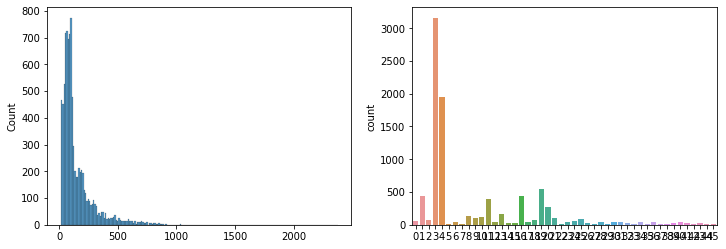

In [13]:
# 뉴스 기사의 평균 길이
plt.figure(figsize=(12,4))
len_sample = [len(x) for x in x_train]
plt.subplot(121);sns.histplot(x=len_sample)
plt.subplot(122);sns.countplot(x=y_train)
print('뉴스 기사의 평균길이 : ', np.mean(len_sample))

In [14]:
# 데이터 전처리: 패딩
MAX_LEN = 128
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=MAX_LEN)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=MAX_LEN)
print('훈련 데이터: ', x_train.shape, y_train.shape)
print('테스트 데이터: ', x_test.shape, y_test.shape)

훈련 데이터:  (8982, 128) (8982,)
테스트 데이터:  (2246, 128) (2246,)


### | 임베딩 매트릭스 제작

```
! gdown https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY&export=download
! unzip  /content/glove.6B.zip
```


In [ ]:
! gdown https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY&export=download

In [ ]:
! unzip  /content/glove.6B.zip

#### **단어-임베딩 딕셔너리**

```
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
```

#### **인덱싱-단어 딕셔너리**

In [26]:
word2index = tf.keras.datasets.reuters.get_word_index()
#print(word2index)
index2word = {}
for word, index in word2index.items():
  #print(word, index)
  index2word[index+3]=word
print(index2word)

{10999: 'mdbl', 16263: 'fawc', 12092: 'degussa', 8806: 'woods', 13799: 'hanging', 20675: 'localized', 20676: 'sation', 20678: 'chanthaburi', 11000: 'refunding', 8807: 'hermann', 20679: 'passsengers', 20680: 'stipulate', 8355: 'heublein', 20716: 'screaming', 16264: 'tcby', 188: 'four', 1645: 'grains', 20683: 'broiler', 12093: 'wooden', 1223: 'wednesday', 13800: 'highveld', 7596: 'duffour', 20684: '0053', 3917: 'elections', 2566: '270', 3554: '271', 5116: '272', 3555: '273', 3403: '274', 7978: 'rudman', 3404: '276', 3481: '277', 3635: '278', 4312: '279', 9384: 'dormancy', 7250: 'errors', 3089: 'deferred', 20686: 'sptnd', 8808: 'cooking', 20687: 'stratabit', 16265: 'designing', 20688: 'metalurgicos', 13801: 'databank', 20689: '300er', 20690: 'shocks', 7975: 'nawg', 20691: 'tnta', 20692: 'perforations', 2894: 'affiliates', 20693: '27p', 16266: 'ching', 598: 'china', 16267: 'wagyu', 3192: 'affiliated', 16268: 'chino', 16269: 'chinh', 20695: 'slickline', 13802: 'doldrums', 12095: 'kids', 303

In [27]:
for x in x_train[0]:
  if index2word.get(x)is not None:
    print(index2word[x] ) # 1000개 단어 외에는 생략되기 때문에 

said
as
a
result
of
its
december
acquisition
of
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


#### **매트릭스 제작**

### | 모델학습 1

이때까지 배운 레이어를 사용하여 모델을 구축하세요.

```
Embedding()
RNN()
LSTM()
GRU()
GlobalAveragePooling1D()
Dense()
```

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 128, 100)          100000    
                                                                 
 gru_3 (GRU)                 (None, 64)                31872     
                                                                 
 dense_3 (Dense)             (None, 46)                2990      
                                                                 
Total params: 134,862
Trainable params: 134,862
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
71/71 [==============================] - 3s 15ms/step - loss: 2.7747 - acc: 0.3399 - val_loss: 2.2005 - val_acc: 0.3620
Epoch 2/20
71/71 [==============================] - 1s

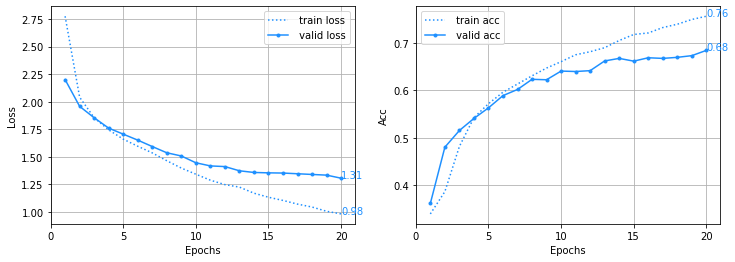

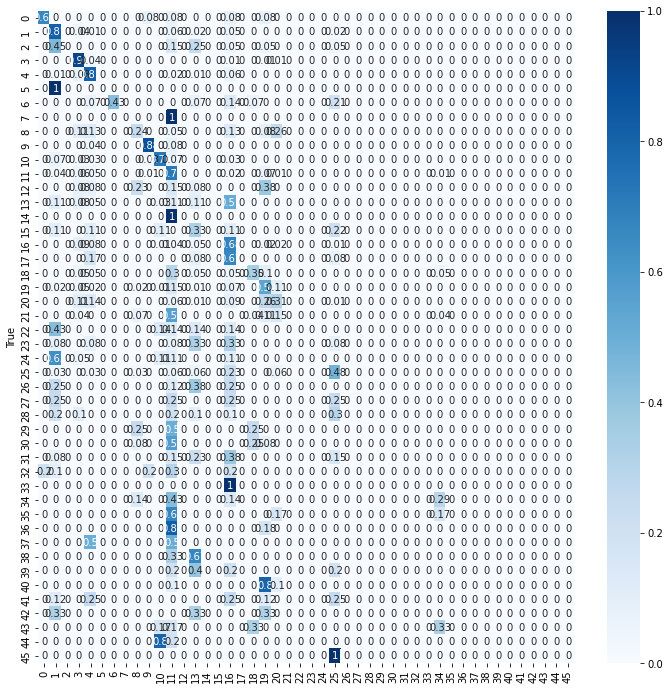

In [31]:
# 레이어를 조합해서 72%이상~

EMB_DIMS=100
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.GRU(64)(y)
y = layers.Dense(46, activation='softmax')(y)
model = models.Model(x,y)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
                   batch_size=128,
                   epochs=20,
                   validation_data=(x_test, y_test))

plot_lcurve([history], [''], ['dodgerblue'], x_itv=5)
draw_cm(model, x_test, y_test) # 스크립트-혼돈행렬 플롯

### | 모델학습 2

![](https://www.researchgate.net/profile/Arvind-Mohan-3/publication/324769532/figure/fig2/AS:619510805561344@1524714294669/LSTM-and-BiLSTM-Architectures.png)

## 스팀 리뷰 감성 분류
---

https://wikidocs.net/94748

```
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh
```